
## 0. Summary ##
Erreichter Score: *0.73206*<br>
https://www.kaggle.com/gedkon <br>

In [16]:
# Laden der Module
import matplotlib.pyplot as mp
import math
import numpy as np
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

# Laden der Daten
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# Hilfsfunktion zur lesbaren Darstellung von Floats
float_formatter = lambda x: "%.3f" % x

## 1. Feature Engineering ##

In [17]:
# Begutachtung der Daten
#train_data.describe()
#test_data.describe()

# Nullwerte
#print(train_data.isnull().sum())
#print(train_data.info())

#print(test_data.isnull().sum())
#print(test_data.info())

Bei der Begutachtung der Daten ist aufgefallen, dass nicht alle Altersdaten der Passagiere vorhanden sind.
Um das Feature nutzen zu können, werden leere Einträge mit dem Altersdurchschnitt aus den vorhandenen Altersdaten gefüllt.
Des weiteren fehlt in den Test-Daten ein Eintrag unter *Fare*. Wir setzen dort ebenfalls den Durchschnittswert von *Fare* ein:

In [18]:
# Ermittlung des Durchschnittsalters über Test- und Train-Daten
medF_train = train_data[train_data["Sex"] == "female"]["Age"].median()
medM_train = train_data[train_data["Sex"] == "male"]["Age"].median()
medF_test = test_data[test_data["Sex"] == "female"]["Age"].median()
medM_test = test_data[test_data["Sex"] == "male"]["Age"].median()

medF = np.median(np.array([medF_train, medF_test]))
medM = np.median(np.array([medM_train, medM_test]))

# Füllen alle leeren Zellen mit dem Durchschnitt
train_data["Age"][train_data["Sex"] == "female"] = train_data.Age.fillna(medF)
train_data["Age"][train_data["Sex"] == "male"] = train_data.Age.fillna(medM)

test_data["Age"][test_data["Sex"] == "female"] = test_data.Age.fillna(medF)
test_data["Age"][test_data["Sex"] == "male"] = test_data.Age.fillna(medM)

# Ermittlung des Durchschnittspreises über Test- und Train-Daten
med_fare_train = train_data["Fare"].median()
med_fare_test = test_data["Fare"].median()

med_fare = np.median(np.array([med_fare_train, med_fare_test]))

# Füllen der leeren Zelle mit dem Durchschnitt
test_data["Fare"] = test_data.Fare.fillna(med_fare)


/Users/work/Documents/Studium/S4SS17/WT_Entwicklung/uebung1/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/work/Documents/Studium/S4SS17/WT_Entwicklung/uebung1/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/work/Documents/Studium/S4SS17/WT_Entwicklung/uebung1/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

Ersetzung der Features in String-Repräsentation durch korrespondierende Integer-Werte:

In [19]:
# Geschlecht
genders = {"male": 1, "female": 0}

train_data["Sex"] = train_data["Sex"].apply(lambda s: genders.get(s))
test_data["Sex"] = test_data["Sex"].apply(lambda s: genders.get(s))

# Ort der Einschiffung
embarkments = {"U": 0, "S": 1, "C": 2, "Q": 3}

train_data["Embarked"] = train_data["Embarked"].fillna("U").apply(lambda e: embarkments.get(e))
test_data["Embarked"] = test_data["Embarked"].fillna("U").apply(lambda e: embarkments.get(e))

In [20]:
# Ersetzen der Kabinendaten in den Trainingsdaten
train_data["Cabin"] = train_data["Cabin"].replace(to_replace="^[A-Z]*", value=1, regex=True)
train_data["Cabin"] = train_data["Cabin"].fillna(0)

# Ersetzen der Kabinendaten in den Testdaten
test_data["Cabin"] = test_data["Cabin"].replace(to_replace="^[A-Z]*", value=1, regex=True)
test_data["Cabin"] = test_data["Cabin"].fillna(0)

### Übersicht über die verwendeten Trainingsdaten ###

In [21]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1.0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1.0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0.0,1
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,0.0,3
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,1.0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0.0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0.0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0.0,2


In [22]:
#train_data.describe()
#test_data.describe()

# Nullwerte
#print(train_data.isnull().sum())
#print(train_data.info())

#print(test_data.isnull().sum())
#print(test_data.info())

Die gewählten Features werden zur Klassifizierung von Pandas-Dataframe in NumPy-Arrays konvertiert:

In [23]:
# 'Survived' ist unser Zielwert Y
data_Y = train_data['Survived'].as_matrix()
Y = np.array([data_Y])

# Folgende weiteren Spalten sind unsere Input-Features
x1 = train_data['Pclass'].as_matrix()
x2 = train_data['Sex'].as_matrix()
x3 = train_data['Age'].as_matrix()
x4 = train_data['SibSp'].as_matrix()
x5 = train_data['Parch'].as_matrix()
x6 = train_data['Fare'].as_matrix()
x7 = train_data['Embarked'].as_matrix()
x8 = train_data['Cabin'].as_matrix()

TRAIN = np.array([x1, x2, x3, x4, x5, x6, x7])

# Input-Features der Testdaten
t1 = test_data['Pclass'].as_matrix()
t2 = test_data['Sex'].as_matrix()
t3 = test_data['Age'].as_matrix()
t4 = test_data['SibSp'].as_matrix()
t5 = test_data['Parch'].as_matrix()
t6 = test_data['Fare'].as_matrix()
t7 = test_data['Embarked'].as_matrix()
t8 = test_data['Cabin'].as_matrix()

TEST = np.array([t1, t2, t3, t4, t5, t6, t7])

## 2. Klassifizierung ##

Die Zielwerte sind *binär* bzw. in diesem Fall ist es ein Zwei-Klassenproblem *Survived ∈ {0, 1}*. ->  *logistische Regression*, da diese besonders für Binärkoeffizienten geeignet ist.

In [24]:
# Anzahl der Features
m = TRAIN.shape[0]

# Wir erzeugen m+1 THETA-Werte als Startwerte für den Regressionsalgorithmus
thetas = np.linspace(1, m, m+1)
print("Thetas:\n", thetas)

Thetas:
 [ 1.          1.85714286  2.71428571  3.57142857  4.42857143  5.28571429
  6.14285714  7.        ]


Hypothese: *h(x) = g(z)*, wobei *z = Thetas *\* *x* und *g(z) = 1/1 + e^(-z)*<br>
Funktion soll vorhersagen *Survived = 0*, wenn *h(x) < 0.5* und *Survived = 1*, wenn *h(x) >= 0.5*

In [25]:
def hypothesis(thetas):
    t = thetas[1:]
    return lambda x: 1/(1 + np.exp(-thetas[0] -  np.dot(x.transpose(),t)))

h = hypothesis(thetas)

Feature Scaling mittels Standardisierung:

In [26]:
def feature_scaling(feature):
    return (feature - feature.mean()) / feature.std()

for key, feature in enumerate(TRAIN):
    TRAIN[key] = feature_scaling(feature)

for key, feature in enumerate(TEST):
    TEST[key] = feature_scaling(feature)


Kostenfunktion: 1/m \* ∑ cost(h(x),y) <br>
wobei cost(h(x), y) = - y \* log(h(x)) - (1 - y) \* log(1 - h(x))

In [27]:
def cost_function(h, X, Y):
    m = X.shape[1]
    def f(thetas):
        h = hypothesis(thetas)
        return (-1./m) * (Y*np.log(h(X)) + (1 - Y)*np.log(1 - h(X))).sum()
    
    return f 

j = cost_function(hypothesis, TRAIN, Y)

Gradientenabstiegsverfahren<br>
*compute_new_theta* ist die Update-Rule zum Erzeugen neuer Theta-Werte. In *thetas_opt* werden die ermittelten optimalen Thetas mit minimalen Kosten gespeichert.

In [28]:
def compute_new_theta(x, y, thetas, alpha):
    m = Y.shape[1]
    return thetas - alpha * 1 / m * (((1/(1 + np.exp(-thetas[0] +  np.dot(x.transpose(), -thetas[1:])))) - y) * x).sum()

# Testwerte für den Gradientenabstieg
#alpha = np.linspace(0.01, 0.001, 4)
# Durch Testen ermittelter Wert
alpha = [0.005]

# Anzahl der Iteration zur Minimierung der Kosten (ermittelt durch Testen)
iterations = 10000
thetas_opt = np.zeros(m)

# Gradientenabstiegsverfahren für iterations * alpha
def gradient_descent(alpha, thetas, iterations, x, y):
    costs = np.zeros([len(alpha), iterations])
    for a in range(len(alpha)):
        thetas_sum = np.zeros([iterations])
        for i in range(0, iterations):
            thetas = compute_new_theta(TRAIN, Y, thetas, alpha[a])
            costs[a][i] = j(thetas)      
            thetas_sum[i] = thetas.sum()
    return thetas_sum, costs, thetas

thetas_sum, costs, thetas_opt = gradient_descent(alpha,thetas,iterations, TRAIN, Y)

print("Startwerte Thetas:\n", thetas, "\nBest-Fit Thetas:\n", thetas_opt)

/Users/work/Documents/Studium/S4SS17/WT_Entwicklung/uebung1/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/work/Documents/Studium/S4SS17/WT_Entwicklung/uebung1/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Startwerte Thetas:
 [ 1.          1.85714286  2.71428571  3.57142857  4.42857143  5.28571429
  6.14285714  7.        ] 
Best-Fit Thetas:
 [-5.12131181 -4.26416895 -3.40702609 -2.54988324 -1.69274038 -0.83559752
  0.02154534  0.87868819]


Visualisierung des Gradientenabstiegsverfahren:

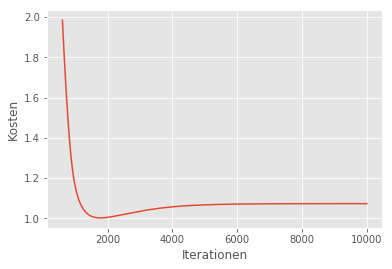

In [29]:
fig = plt.figure()
plt.xlabel('Iterationen')
plt.ylabel('Kosten')

for i, c in enumerate(costs):
    plt.plot(costs[i])


Die aufsummierten Thetas zeigen, daß Konvergenz erreicht wird:

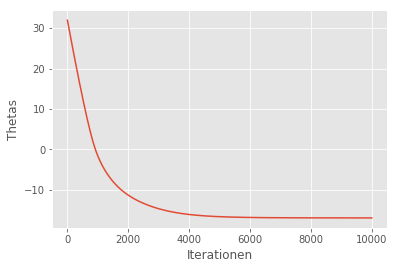

In [30]:
fig = plt.figure()
plt.xlabel('Iterationen')
plt.ylabel('Thetas')
plt.plot(thetas_sum)

## 3. Ergebnisse ##
Die ermittelten Thetas teste ich mithilfe der Trainingsdaten. Dann wende ich die Hypothese auf die Testdaten an und gebe die Ergebnisse aus:

In [31]:
# TEST mit Trainingsdaten
H = hypothesis(thetas_opt)

result_hypothese = 0
result_train = 0
correct = 0

print("Gesamtanzahl Datensätze:", Y[0].size)

RESULT = [[0 for x in range(2)] for y in range(0, Y[0].size)] 

# Vorhersage Trainingsdaten
for i,val in enumerate(H(TRAIN)):
    if (val >= 0.5):
        result_hypothese = result_hypothese + 1
        RESULT[i][0] = 1
    else:
        RESULT[i][0] = 0

# Ziel (Y-Werte)
for i,val in enumerate(Y[0]):
    if (val == 1):
        result_train = result_train + 1
        RESULT[i][1] = 1
    else:
        RESULT[i][1] = 0

print("'Survived' vorhergesagt: ", result_hypothese, "\n'Survived' laut Trainingsdaten:", result_train)

# Vergleichen von Vorhersage und Ziel
for i,val in enumerate(RESULT):
    if (val[0] == val[1]):
        correct = correct + 1

correct_percent = correct / (Y[0].size / 100)
print ("Insgesamt korrekt vorhergesagt: ", correct, "in Prozent: ", float_formatter(correct_percent), "%")



Gesamtanzahl Datensätze: 891
'Survived' vorhergesagt:  195 
'Survived' laut Trainingsdaten: 342
Insgesamt korrekt vorhergesagt:  680 in Prozent:  76.319 %


In [32]:
# Ermittlung der Zielwerte der Testdaten
H = hypothesis(thetas_opt)

result_hypothese = 0
RESULT = [0 for x in range(TEST[0].size)]

for i,val in enumerate(H(TEST)):
    if (val >= 0.5):
        result_hypothese = result_hypothese + 1
        RESULT[i] = 1
    else:
        RESULT[i] = 0
    
print("Datensätze gesamt: ", TEST[0].size, " davon 'Survived':", result_hypothese)



Datensätze gesamt:  418  davon 'Survived': 74


Zum Abschluss erzeuge ich eine CSV-Datei, die ich bei Kaggle hochlade:

In [33]:
survived = pd.DataFrame({'Survived' : RESULT, 'PassengerId' : test_data["PassengerId"]})
survived.to_csv('data/result.csv', index=False)